In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

os.chdir(os.path.abspath("/Users/dipalshah/Desktop/prosperity3"))

#for Aryan: /Users/dipalshah/Desktop/prosperity3
#for Tarun: /Users/tarun/Desktop/Finance_Projects/prosperity3
#add yours: right click round_1 folder and copy path, then paste and remove the round_1 part

print("Working directory set to:", os.getcwd())

from tools import Plotter, Regressor

Working directory set to: /Users/dipalshah/Desktop/prosperity3


In [2]:
p1 = pd.read_csv("round_2/data/prices_round_2_day_-1.csv", sep=";", index_col = "timestamp")
p2 = pd.read_csv("round_2/data/prices_round_2_day_0.csv", sep=";", index_col = "timestamp")
p3 = pd.read_csv("round_2/data/prices_round_2_day_1.csv", sep=";", index_col = "timestamp")
t1 = pd.read_csv("round_2/data/trades_round_2_day_-1.csv", sep=";", index_col = "timestamp")
t2 = pd.read_csv("round_2/data/trades_round_2_day_0.csv", sep=";", index_col = "timestamp")
t3 = pd.read_csv("round_2/data/trades_round_2_day_1.csv", sep=";", index_col = "timestamp")

In [3]:
p1

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,-1,CROISSANTS,4304,112,NaN,NaN,NaN,NaN,4305,112,NaN,NaN,NaN,NaN,4304.5,0.0
0,-1,JAMS,6670,66,6669.0,137.0,NaN,NaN,6671,66,6672.0,137.0,NaN,NaN,6670.5,0.0
0,-1,SQUID_INK,2005,1,2002.0,31.0,NaN,NaN,2006,31,NaN,NaN,NaN,NaN,2005.5,0.0
0,-1,PICNIC_BASKET1,59284,20,59283.0,18.0,NaN,NaN,59294,2,59295.0,36.0,NaN,NaN,59289.0,0.0
0,-1,PICNIC_BASKET2,30606,20,30605.0,18.0,NaN,NaN,30612,20,30613.0,18.0,NaN,NaN,30609.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999900,-1,DJEMBES,13493,76,NaN,NaN,NaN,NaN,13494,76,NaN,NaN,NaN,NaN,13493.5,0.0
999900,-1,KELP,2028,31,NaN,NaN,NaN,NaN,2030,6,2031.0,31.0,NaN,NaN,2029.0,0.0
999900,-1,RAINFOREST_RESIN,9996,2,9995.0,29.0,NaN,NaN,10004,2,10005.0,29.0,NaN,NaN,10000.0,0.0


In [4]:
t1

,buyer,seller,symbol,currency,price,quantity
timestamp,,,,,,
0,NaN,NaN,KELP,SEASHELLS,2029.0,13
0,NaN,NaN,KELP,SEASHELLS,2029.0,1
0,NaN,NaN,RAINFOREST_RESIN,SEASHELLS,10004.0,1
0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,13
0,NaN,NaN,SQUID_INK,SEASHELLS,2006.0,1
...,...,...,...,...,...,...
999500,NaN,NaN,KELP,SEASHELLS,2030.0,2
999500,NaN,NaN,SQUID_INK,SEASHELLS,1972.0,2
999600,NaN,NaN,CROISSANTS,SEASHELLS,4321.0,8


<Axes: >

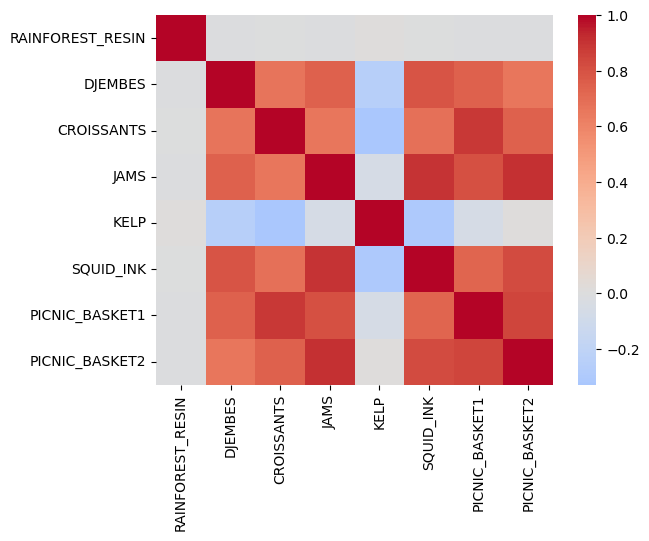

In [5]:
p = p2

prices_by_product = pd.DataFrame([p[p["product"] == product]["mid_price"].values for product in p["product"].unique()])
prices_by_product = prices_by_product.transpose()
prices_by_product.columns = p["product"].unique()
prices_by_product.index = p[p["product"] == "KELP"].index

corr = prices_by_product.corr()
sns.heatmap(corr, cmap = "coolwarm", center = 0)

<Axes: >

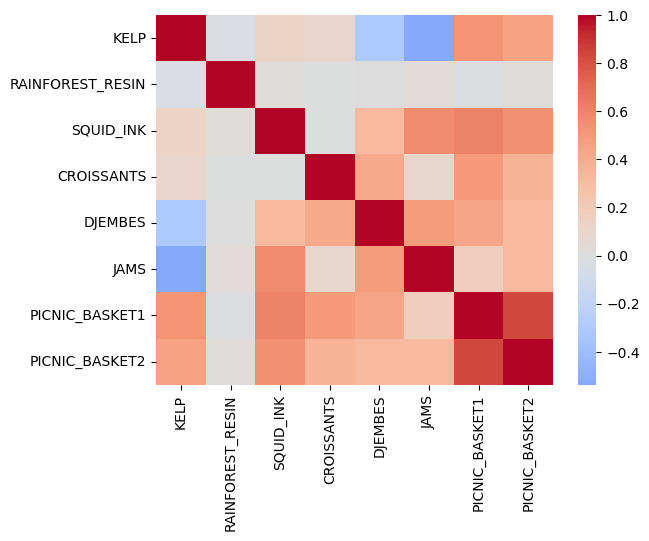

In [6]:
trades_by_product = pd.DataFrame([t1[t1["symbol"] == product]["price"].values for product in t1["symbol"].unique()])
trades_by_product = trades_by_product.transpose()
trades_by_product.columns = t1["symbol"].unique()
trades_by_product.index = t1[t1["symbol"] == "KELP"].index

corr = trades_by_product.corr()
sns.heatmap(corr, cmap = "coolwarm", center = 0)

In [7]:
prices_by_product

,RAINFOREST_RESIN,DJEMBES,CROISSANTS,JAMS,KELP,SQUID_INK,PICNIC_BASKET1,PICNIC_BASKET2
timestamp,,,,,,,,
0,10001.5,13493.5,4321.5,6632.0,2030.0,1969.5,59228.5,30505.0
100,9999.0,13493.0,4321.5,6631.5,2031.0,1970.0,59228.0,30504.0
200,10000.0,13493.5,4321.5,6632.0,2030.5,1967.5,59234.5,30505.5
300,9997.0,13493.5,4321.5,6632.0,2030.5,1966.5,59228.5,30501.5
400,10001.0,13493.5,4321.5,6632.0,2029.5,1967.0,59230.5,30505.5
...,...,...,...,...,...,...,...,...
999500,9998.5,13410.5,4275.5,6541.0,2033.5,1831.5,58717.5,30254.0
999600,9999.0,13410.5,4275.5,6541.0,2033.5,1833.0,58720.0,30253.0
999700,10000.0,13411.0,4275.5,6541.0,2034.5,1834.5,58722.5,30255.5


In [8]:
trades_by_product

,KELP,RAINFOREST_RESIN,SQUID_INK,CROISSANTS,DJEMBES,JAMS,PICNIC_BASKET1,PICNIC_BASKET2
timestamp,,,,,,,,
0,2029.0,10004.0,2006.0,4304.0,13452.0,6671.0,59304.0,30623.0
0,2029.0,9996.0,2006.0,4305.0,13449.0,6674.0,59304.0,30626.0
1700,2026.0,10002.0,2009.0,4305.0,13447.0,6673.0,59306.0,30615.0
1900,2026.0,10002.0,2010.0,4304.0,13449.0,6670.0,59305.0,30614.0
2400,2025.0,9998.0,2009.0,4304.0,13448.0,6672.0,59279.0,30603.0
...,...,...,...,...,...,...,...,...
999100,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999200,2030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999200,2029.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
def price_trade_plot(product):
    trades = trades_by_product[product]
    prices = prices_by_product[product]

    plt.scatter(prices.loc[trades.index], trades)
    plt.title(product)
    plt.xlabel("Prices")
    plt.ylabel("Trades")

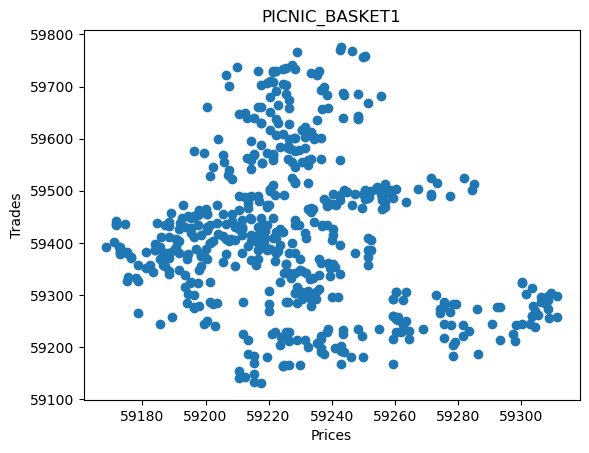

In [10]:
price_trade_plot("PICNIC_BASKET1")

In [11]:
import statsmodels.formula.api as smf

prices_by_product["combo1"] = (
    6 * prices_by_product["CROISSANTS"] +
    1 * prices_by_product["DJEMBES"] +
    3 * prices_by_product["JAMS"]
)

model_basket_1 = smf.ols("PICNIC_BASKET1 ~ CROISSANTS + DJEMBES + JAMS + KELP", data = prices_by_product)
result_basket_1 = model_basket_1.fit()

print(result_basket_1.summary())

                            OLS Regression Results                            
Dep. Variable:         PICNIC_BASKET1   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 2.759e+04
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:33:02   Log-Likelihood:                -51492.
No. Observations:               10000   AIC:                         1.030e+05
Df Residuals:                    9995   BIC:                         1.030e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.299e+04    491.756    -26.425      0.0

In [12]:
import statsmodels.formula.api as smf

prices_by_product["combo2"] = (
    4 * prices_by_product["CROISSANTS"] +
    2 * prices_by_product["JAMS"]
)

model_basket_2 = smf.ols("PICNIC_BASKET2 ~ CROISSANTS + JAMS", data = prices_by_product)
result_basket_2 = model_basket_2.fit()

print(result_basket_2.summary())

                            OLS Regression Results                            
Dep. Variable:         PICNIC_BASKET2   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.281e+04
Date:                Thu, 10 Apr 2025   Prob (F-statistic):               0.00
Time:                        20:33:02   Log-Likelihood:                -46831.
No. Observations:               10000   AIC:                         9.367e+04
Df Residuals:                    9997   BIC:                         9.369e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.403e+04     75.992    184.608      0.0

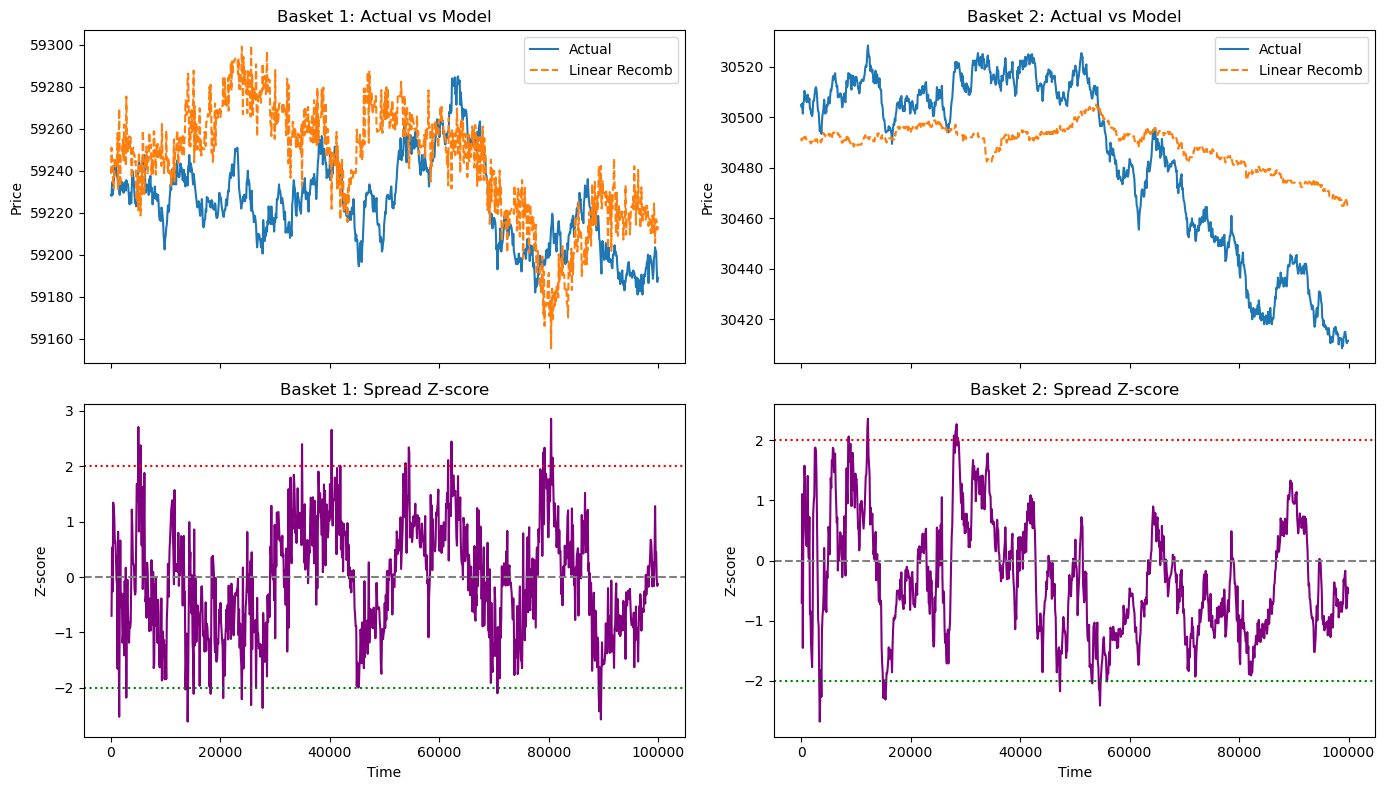

In [16]:
N = 0
L = 1000

# Slice the DataFrame
window = slice(N, N + L)

p = p2

prices_by_product = pd.DataFrame([p[p["product"] == product]["mid_price"].values for product in p["product"].unique()])
prices_by_product = prices_by_product.transpose()
prices_by_product.columns = p["product"].unique()
prices_by_product.index = p[p["product"] == "KELP"].index

prices_by_product["combo1"] = (
    6 * prices_by_product["CROISSANTS"] +
    1 * prices_by_product["DJEMBES"] +
    3 * prices_by_product["JAMS"]
)

prices_by_product["combo2"] = (
    4 * prices_by_product["CROISSANTS"] +
    2 * prices_by_product["JAMS"]
)

# --- Compute spreads and z-scores ---
lookback = 100  # You can tune this
spread1 = prices_by_product["PICNIC_BASKET1"] - result_basket_1.predict(prices_by_product)
spread2 = prices_by_product["PICNIC_BASKET2"] - result_basket_2.predict(prices_by_product)

zscore1 = (spread1 - spread1.ewm(span = lookback).mean()) / spread1.ewm(span = lookback).std()
zscore2 = (spread2 - spread2.ewm(span = lookback).mean()) / spread2.ewm(span = lookback).std()

# --- Plot ---
fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True)

# --- Basket 1 Price Comparison ---
axs[0, 0].plot(prices_by_product["PICNIC_BASKET1"].iloc[window], label="Actual")
axs[0, 0].plot(result_basket_1.predict(prices_by_product).iloc[window], label="Linear Recomb", linestyle="--")
axs[0, 0].set_title("Basket 1: Actual vs Model")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend()

# --- Basket 1 Spread Z-score ---
axs[1, 0].plot(zscore1.iloc[window], color='purple')
axs[1, 0].axhline(0, color='gray', linestyle='--')
axs[1, 0].axhline(2, color='red', linestyle=':')
axs[1, 0].axhline(-2, color='green', linestyle=':')
axs[1, 0].set_title("Basket 1: Spread Z-score")
axs[1, 0].set_ylabel("Z-score")
axs[1, 0].set_xlabel("Time")

# --- Basket 2 Price Comparison ---
axs[0, 1].plot(prices_by_product["PICNIC_BASKET2"].iloc[window], label="Actual")
axs[0, 1].plot(result_basket_2.predict(prices_by_product).iloc[window], label="Linear Recomb", linestyle="--")
axs[0, 1].set_title("Basket 2: Actual vs Model")
axs[0, 1].set_ylabel("Price")
axs[0, 1].legend()

# --- Basket 2 Spread Z-score ---
axs[1, 1].plot(zscore2.iloc[window], color='purple')
axs[1, 1].axhline(0, color='gray', linestyle='--')
axs[1, 1].axhline(2, color='red', linestyle=':')
axs[1, 1].axhline(-2, color='green', linestyle=':')
axs[1, 1].set_title("Basket 2: Spread Z-score")
axs[1, 1].set_ylabel("Z-score")
axs[1, 1].set_xlabel("Time")

plt.tight_layout()
plt.show()
